In [1]:
from panel_segmentation import panel_detection as pseg
import numpy as np
from tensorflow.keras.preprocessing import image as imagex
import matplotlib.pyplot as plt
import os

# Run a system through the Panel-Segmentation detection pipeline

Use a set of latitude-longitude coordinates for an NREL site.

In [2]:
#Example latitude-longitude coordinates to run the analysis on.
latitude = 39.7407
longitude = -105.1694    
google_maps_api_key = "YOUR API KEY HERE"
file_name_save = "./panel_segmentation/examples/Panel_Detection_Examples/sat_img_ex.png"

Create an instance of the PanelDetection class and generate a satellite image of the site at the lat-long coordinates. 

C:\Users\kperry\.conda\envs\panel-segmentation\lib\site-packages\urllib3\connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'maps.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


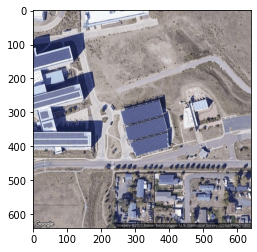

In [3]:
#CREATE AN INSTANCE OF THE PANELDETECTION CLASS TO RUN THE ANALYSIS
panelseg = pseg.PanelDetection()

#GENERATE A SATELLITE IMAGE USING THE ASSOCIATED LAT-LONG COORDS AND THE GOOGLE
#MAPS API KEY
img = panelseg.generateSatelliteImage(latitude, longitude,
                                      file_name_save,
                                      google_maps_api_key)
#Show the generated satellite image
plt.imshow(img)

Load in the image and declare it as a numpy array.

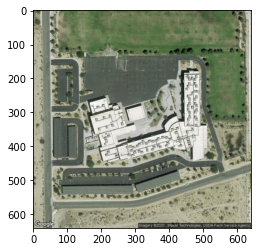

In [4]:
x = imagex.load_img("./panel_segmentation/examples/Panel_Detection_Examples/sat_img.png", 
                        color_mode='rgb', 
                        target_size=(640,640))
plt.imshow(x)
x = np.array(x)

Use the classifier model to confirm if there are solar arrays detected in the satellite image.

In [5]:
panel_loc = panelseg.hasPanels(x)
print(panel_loc)

True


Classify the image by mounting configuration, using the mounting configuration object detection algorithm.

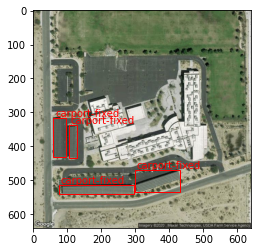

In [6]:
(scores, labels, boxes) = panelseg.classifyMountingConfiguration(image_file_path = "./panel_segmentation/examples/Panel_Detection_Examples/sat_img.png",
                                                                   acc_cutoff = .65)

First, mask the satellite image, and then crop out the panels.

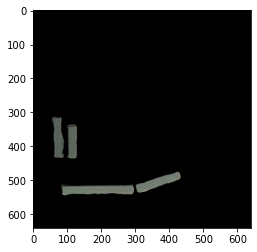

In [7]:
#Mask the satellite image
res = panelseg.testSingle(x.astype(float), test_mask=None,  model =None)    
#Use the mask to isolate the panels
new_res = panelseg.cropPanels(x, res)
plt.imshow(new_res.reshape(640,640,3))

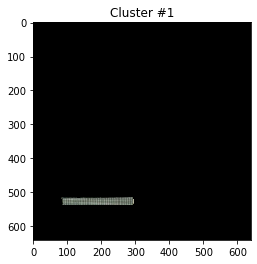

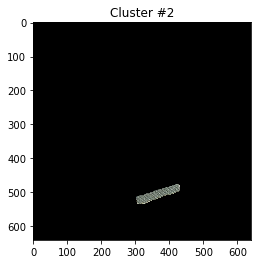

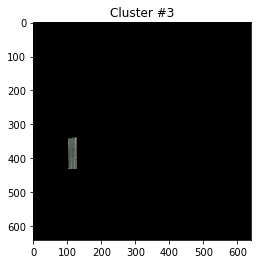

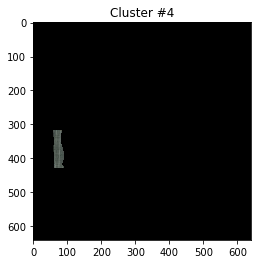

In [8]:
import cv2
rest = cv2.cvtColor(res,cv2.COLOR_GRAY2RGB)
#Cluster the solar arrays in the image using connected components clustering.
n,clusters = panelseg.clusterPanels(new_res,
                                    boxes,
                                    fig=True)


179.0
161.0
91.0
90.0


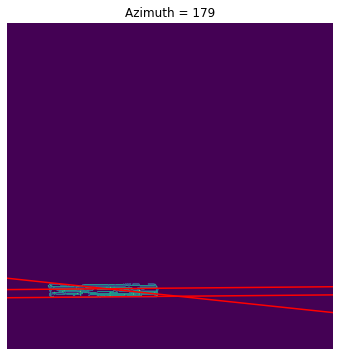

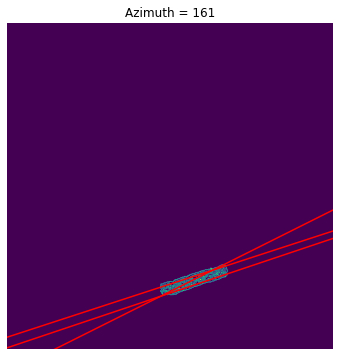

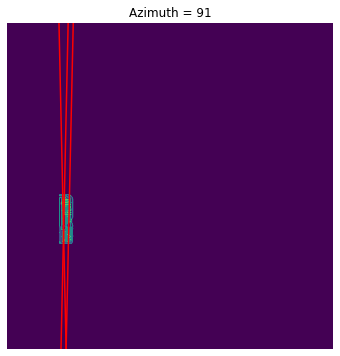

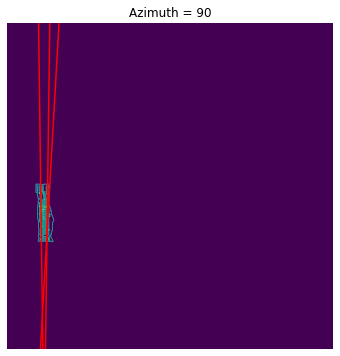

In [9]:
#Calculate the azimuth for each cluster
for ii in np.arange(clusters.shape[0]):
        az = panelseg.detectAzimuth(clusters[ii][np.newaxis,:])
        print(az)
        
#Plot the azimuth estimate for each cluster
panelseg.plotEdgeAz(clusters, 3, 1,                         
                    save_img_file_path = './panel_segmentation/examples/Panel_Detection_Examples/')

Now let's run the complete pipeline function on an example site:

Image not generated. Using image ./panel_segmentation/examples/Panel_Detection_Examples/sat_img.png...


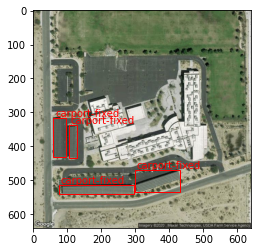

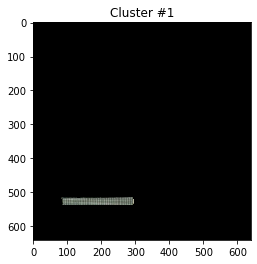

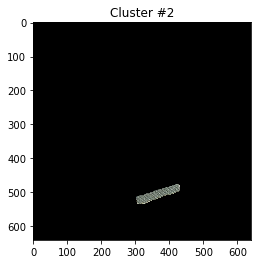

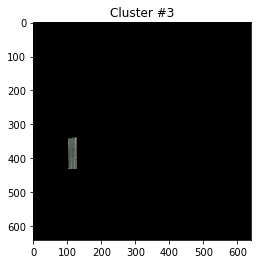

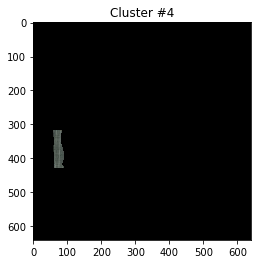

{'associated_azimuths': [179.0, 161.0, 91.0, 90.0],
 'mounting_type': ['carport-fixed',
  'carport-fixed',
  'carport-fixed',
  'carport-fixed']}

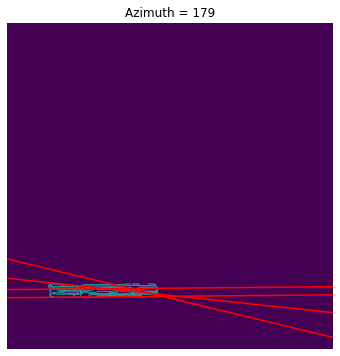

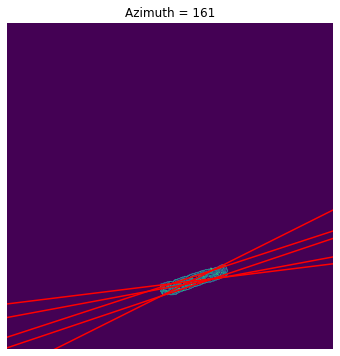

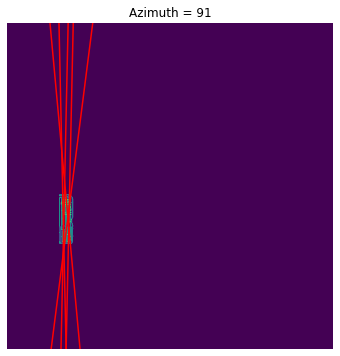

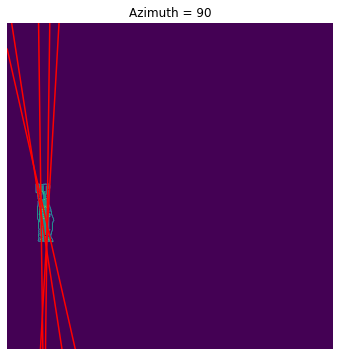

In [10]:
panelseg.runSiteAnalysisPipeline(file_name_save_img="./panel_segmentation/examples/Panel_Detection_Examples/sat_img.png")